In [1]:
import sqlite3

# Connect to SQLite database (it will be created if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# Sample data
sample_sales = [
    ('Laptop', 5, 800),
    ('Phone', 10, 500),
    ('Tablet', 7, 300),
    ('Laptop', 3, 800),
    ('Phone', 4, 500),
]

# Insert sample data
cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_sales)
conn.commit()


In [2]:
import pandas as pd

# SQL Query to get total quantity and revenue per product
query = '''
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''

# Read SQL result into a DataFrame
df = pd.read_sql_query(query, conn)

# Print the summary table
print("Sales Summary:")
print(df)


Sales Summary:
  product  total_qty  revenue
0  Laptop          8   6400.0
1   Phone         14   7000.0
2  Tablet          7   2100.0


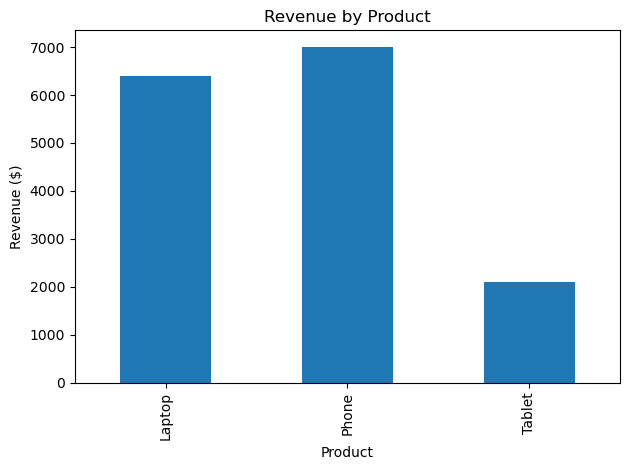

In [3]:
import matplotlib.pyplot as plt

# Plot bar chart for revenue by product
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.savefig("sales_chart.png")  # Optional: save chart
plt.show()


In [4]:
conn.close()
